To load relevant activity files into the workspace, run the cell below:

In [1]:
!git clone https://github.com/vyas-research-group/PFAS_Radicals_Lab_Activity

Cloning into 'PFAS_Radicals_Lab_Activity'...
remote: Enumerating objects: 155, done.
remote: Counting objects: 100% (155/155), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 155 (delta 115), reused 154 (delta 114), pack-reused 0
Receiving objects: 100% (155/155), 5.91 MiB | 19.64 MiB/s, done.
Resolving deltas: 100% (115/115), done.


A new folder should appear in your workspace. Navigate to the folder icon on the left and look for the new folder *PFAS_Radicals_Lab_Activity/*.


# PFAS Radicals: A Quantum Chemistry Perspective [MODULE 1]
---
In this lab exercise, you will:  
  
>  
>**Module 1**  
>  
>1. Model the equilibrium geometry and IR frequencies of the CH3 radical and compare to the CF3 radical  
>2. Develop a Python function to parse data from ORCA output files  
>
>**Module 2**  
>  
>3. Scan the X-C-X bond angle from 120 degrees to 95 degrees and compare results between the CH3 radical and the CF3 radical  
>4. Develop a Python function to write and edit ORCA input files  
>
>**Module 3**  
>  
>5. Use Python to analyze results from your ORCA calculations  
>  
  


This module will cover items **1** and **2**.

## Introduction  
---
### What are PFAS?  
PFAS (per- and polyfluoroalkyl substances) are a broad class of pollutants that are exceptionally difficult to break down in the environment. The general structure of a PFAS molecule is a carbon backbone with a per or polyfluorinated chain (i.e. H atoms are replaced by F in a typical hydrocarbon). It is this F substitution that makes PFAS so useful- the C-F bond is very strong, and these compounds are incredibly resistant to heat, abrasion and chemical attack. Common examples of PFAS are found in the teflon-coated stir bars used in chemistry labs, or in fire-fighting foams, industrial lubricants, waterproof clothing and even some fishing lines!  
  
Most methods currently being studied to degrade PFAS molecules into less harmful byproducts proceed through some form of radical intermediate. In this exercise, you will use the quantum mechanics modeling software ORCA to simulate the simplest hydrocarbon radical (CH3) and compare it to the simplest fluorocarbon radical (CF3). Choosing simple systems will make the analysis easier and ensure that the quantum calculations don't take too long.    
  
### What is ORCA?  
ORCA is a quantum mechanical modeling software developed by Frank Neese's group at the Max Planck Institute in Germany. The program is free to use at academic institutions and can be installed on your own machine by making an account at [this site](https://orcaforum.kofo.mpg.de/app.php/portal). ORCA documentation is located [here](https://sites.google.com/site/orcainputlibrary/home) and some handy tutorials can be found [here](https://www.orcasoftware.de/tutorials_orca/#). ORCA is particularly well-known for their implementation of density-functional methods and ability to simulate spectroscopy, in addition to good perfromance with open shell (radical) systems.  
  
### How does ORCA work?  
Similar to may other quantum mechanics simulation software, ORCA uses a special kind of input file to specify the calculation parameters. The input files contain information that determines the level of theory (basis set and functional), the type of calculation (geometry optimizations, IR frequency simulations, other spectroscopy), and the starting locations for all of the atoms in the molecule you want to simulate. There are many other options that may be set, including options to specify solvents, temperatures and pressures, but we will focus primarily on the setting mentioned above.  
  
Once you have written an input file, you will submit the file to the program to be processed. Some instituitons may already have ORCA installed on an HPC system for you to use, or you may run ORCA locally on your own machine.  
ORCA will read the input file and perform the calculations requested, returning a log file describing the calculations made by the program and their results. This log file contains the data you will use to compare the CH3 radical to the CF3 radical.  
  
### How do I write an input file?  
As mentioned previously, input files contain all the information ORCA needs to know what kind of calculation to perform, and the system on which to perform the calculations.  
  
Here is an example input file similar to the ones you will create:  
  
```  
# pentafluoroethyl radical
  
! UKS TightSCF wB97x-D3 def2-TZVPD xyzfile opt freq  
  
* xyz 0 2  
F  -1.517361  -1.101422   0.002686  
F  -1.517591   1.101260   0.002704  
F   1.195563  -1.093474  -0.534274  
F   0.818850  -0.001676   1.317045  
F   1.194824   1.095280  -0.531397  
C  -0.871159  -0.000009  -0.364603  
C   0.609732   0.000059  -0.020541  
*   
```  
  
ORCA is fairly forgiving in how the input file is formatted.   
* Any lines starting with `#` will be interpreted as comments, and you may write any information you need to help identify the job or describe the parameters
    * In this example, the full name of the molecule is given in the comments  
* Lines starting with `!` will be interpreted as commands
    * In this example, the **Unrestricted Kohn-Sham (UKS)** modifier is applied to the **wB97x-D3** functional using the **def2-TZVPD** basis set. The options **TightSCF** sets the convergence criteria and **xyzfile** requests that the final geometry is written to a \*.xyz file. Finally, the **opt freq** requests that ORCA first optimizes the geometry of the molecule and then perfroms and IR frequency calculation.  
* The lines between `*` symbols define the starting geometry, charge and multiplicity of the system
    * In this example, **xyz** specifies the format of the starting geometry, and **0 1*** specifies first the charge of the system (neutral) followed by the multiplicity (singlet/radical). For non-radical systems, the multiplicity is typically 1. The next lines contain the atom name followed by the starting coordinates in x,y and z (units are angstrom).  
  
  
## Module 1: Getting Started  
---
In this first exercise, you will:  
1. Write input files to calculate the equilibrium geometry and IR frequencies for the CH3 and the CF3 radicals
1. Read the output files generate by ORCA and locate useful information  
1. Use python to write a function to extract interesting data from the output file  
   >**IMPORTANT**: Look for `#### START YOUR CODE HERE ####` and `#### END YOUR CODE HERE ####` to indicate where you should edit code.
  
### Writing your input files  
  
In most computational projects, the first step is selecting an appropriate level of theory to use to model your system. This includes the choice of basis set, functional and other parameters, and is typically informed by literature review or benchmarking experiments. This step has been taken care of already. The **wB97x-D3** functional was selected because it performs well simulating IR frequencies, and the **def2-TZVPD** is a typical basis set for modeling PFAS molecules. **UKS** is used so that the program treats spin up and spin down electrons separately and is required for this open-shell calculation. **TightSCF** requests stricter convergence criteria in the self-consistent field iterative cycle than the default to ensure good results. Generating an xyzfile with the **xyzfile** command will be useful in later analysis.  
  
For the first calculations, you will simulate the equilibrium geometry and IR frequencies using the **opt freq** command. You may choose to draw your starting structure in a molecular editor such as Avogadro, or simply calculate the coordinates assuming a trigonal planar geometry using known C-H or C-F bond lengths. The second approach is recommended as you will need to interact with the bond lengths and angles in a matrix form in later steps.  

>**IMPORTANT** Ensure that your input coordinates are structured so that the carbon atom is first, followed by the hydrogen atoms or the fluroine atoms. This will make analysis easier later on.  
  
When you have finished writing your input files, submit them to ORCA on your local machine or on your institution's HPC distribution. If you encounter difficulties, refer to the properly formatted input files located in the companion files.  
  
### Reading the output files  
When the calculations are complete, open the output files (these typically have the extension \*.out) to review the results. Spend a few minutes reading through the calculation results and answer the following questions:  
1. How long did the job take to run?
1. How many iterations did it take for the energy to converge?
  
For the activities to come, you will need to be able to locate the following information:  
1. SCF energy  
1. IR frequencies  
1. Partial charges  
1. Orbital energies  
  
  
### Parsing data from the output files  
Now that you have located the data you will need, you will write a python function to read your output file and parse the data. While it is possible to look through files manually and copy/paste data, using a python program to extract the data you need ensures that results are reproducible. This means that the code behaves consistently, and cannot accidentally copy results from the wrong section of the output file to your analysis files. If the wrong data is propogated, it will be recorded in the code in a way that is repeatable so that it can be easily addressed. In addition, writing a function to parse data from an output file will allow you to extract data much more efficiently than manually reading the files. This will become important in later activities when we need to process multiple files at once.  
  
There are many python packages written to parse output files for quantum chemical calculation, including [**iodata**](https://iodata.readthedocs.io/en/latest/index.html) and [**cclib**](https://cclib.github.io/index.html). We will use a combination of **cclib** and home-built functions to extract the data we need. Lets install **cclib** by running the cell below:
  


In [2]:
!pip install cclib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.6/353.6 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 43.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for periodictable: filename=periodictable-1.7.1-py3-none-any.whl size=752511 sha256=d62cd0a23bef1009a9edb50098d2b7b80d334c7e66d279174887e53ddb82bfe5
  Stored in directory: /root/.cache/pip/wheels/55/2b/21/c35cc7b4e26fffa3ec4f32a74bd09ce6ce04ba7535dd0b92f2
Successfully built periodictable



  
The final parsing function we will use is shown below. Most of the **cclib** functions are already implemented, however, there are a couple of custom functions you will need to write.  
  
Let's walk through this function:  
* The `parse_outfile()` function will first read the file you input using the `cc.ccread()` method. This creates a python object that we can query.  
* Next, we determine which heteroatom was used in the outfile by accessing the **cclib** attribute `atomnos`. We retrieve the second atom number (recall that python is zero-indexed) as a string, and use the heteroatoms dictionary to convert the atomic number to the element symbol.  
* We then retrieve the final energy of the system by accessing the last element (-1) in the `scfenergies` array and use the built-in converter to convert from eV to hartrees.  
* Similarly, we retrieve the final coordinates using the -1 index on the `atomcoords` array. Using the coordinates of the optimized geometry, we calculate the average bond lengths and angles.  
*This is a custom function you will write.*  
* The second to last IR frequency in the `vibfreqs` array corresponds to the C-X bond stretch. When we later scan the bond angle, this may not always be true.  
* After the C-X bond frequency is retrieved, we calculate the force constant using the custom function `calculate_force_constant()`.  
*This is a custom function you will write.*  
* The last two steps require the custom functions `get_partial_charges()` and `get_frontier_orbital_energies()`.  
*You will write the function to retrieve the partial charges. The function to retrieve the frontier orbital energies has been written for you.*  
  
When all of the data has been collected, the function returns the list corresponding to the data names, and the numerical list of the data itself.


```python
import cclib.io as cc
from cclib.parser import utils as ccp

def parse_outfile(outfile_path : str) -> "tuple[list, list]":

    # read the output file into cclib
    outfile = cc.ccread(outfile_path)

    # get the heteroatom used in the calculation
    heteroatoms = {"9" : "F", "1" : "H"}
    heteroatom = heteroatoms[str(outfile.atomnos[1])]

    # get the SCF energy in hartree
    SCF_energy = ccp.convertor(outfile.scfenergies[-1], "eV", "hartree") # [hartree]

    # compute the bond length and angle
    optimized_geometry = outfile.atomcoords[-1]
    bond_length, bond_angle = get_average_bond_lengths_and_angles(optimized_geometry) # [angstroms] , [degrees]

    # get the IR frequency of the C-X bond stretch
    IR_frequency = outfile.vibfreqs[-2] # [wavenumbers]

    # compute the force constant of the C-X bond stretch
    carbon_mass = 12.011 # [amu]
    heteroatom_mass = {'H' : 1.00784, 'F' : 18.998403} # [amu]
    reduced_mass = heteroatom_mass[heteroatom] * carbon_mass / (heteroatom_mass[heteroatom] + carbon_mass) # [amu]
    force_constant = calculate_force_constant(IR_frequency, reduced_mass) # [kg/s^2]
    
    # get the partial charges
    partial_charges = get_partial_charges(outfile)

    # get the frontier orbital energies
    frontier_orbital_energies = get_frontier_orbital_energies(outfile, heteroatom)

    # compile the data to return
    data_names = ['heteroatom', 'bond_angle[deg]', 'scf_energy[hartree]', 'bond_length[angstrom]', 'ir_frequency[wavenumbers]', 'force_constant[mg/s^2]', \
                  'carbon_partial_charge[-]', 'heteroatom_partial_charge[-]', 'homo_energy[hartree]', 'somo-a_energy[hartree]', 'somo-b_energy[hartree]', \
                  'lumo_energy[hartree]', 'lumo+1_energy[hartree]', 'lumo+2_energy[hartree]', 'homo-1_energy[hartree]', 'homo-2_energy[hartree]', \
                  'homo-3_energy[hartree]', 'homo-4_energy[hartree]', 'homo-5_energy[hartree]', 'homo-6_energy[hartree]', 'homo-7_energy[hartree]', \
                  'homo-8_energy[hartree]', 'homo-9_energy[hartree]', 'homo-10_energy[hartree]', 'homo-11_energy[hartree]', 'homo-12_energy[hartree]', \
                  'homo-13_energy[hartree]', 'homo-14_energy[hartree]', 'homo-15_energy[hartree]']
    
    data = [heteroatom, bond_angle, SCF_energy, bond_length, IR_frequency, force_constant, *partial_charges, *frontier_orbital_energies]
    
    return data_names, data
```  
  
  
#### Calculating bond lengths and angles  
---
The first custom functions you will write will compute the average bond lengths and angles using the xyz coordinates of the optimized structure.

The structure for this function is shown below. There are two missing functions (`calculate_bond_length()` and `calculate_bond_angle()`) that you will need to write for the code to work properly.

```python
def get_average_bond_lengths_and_angles(optimized_geometry) -> "tuple[float, float]":
    # extract the atom positions from the geometry array
    carbon_xyz_position = optimized_geometry[0]
    heteroatom1_xyz_position = optimized_geometry[1]
    heteroatom2_xyz_position = optimized_geometry[2]
    heteroatom3_xyz_position = optimized_geometry[3]

    # compute the average bond lengths
    bond1_length = calculate_bond_length(heteroatom1_xyz_position, carbon_xyz_position)
    bond2_length = calculate_bond_length(heteroatom2_xyz_position, carbon_xyz_position)
    bond3_length = calculate_bond_length(heteroatom3_xyz_position, carbon_xyz_position)
    bond_lengths = [bond1_length, bond2_length, bond3_length]
    average_bond_length = np.average(bond_lengths)
    bond_length_range = np.max(bond_lengths) - np.min(bond_lengths)
    assert bond_length_range < 0.1 , "The range in bond lengths is greater than 0.1 angstrom. Check the structure with a molecular visualizer."

    # compute the average bond angles
    bond_angle1 = calculate_bond_angle(heteroatom1_xyz_position, carbon_xyz_position, heteroatom2_xyz_position)
    bond_angle2 = calculate_bond_angle(heteroatom2_xyz_position, carbon_xyz_position, heteroatom3_xyz_position)
    bond_angle3 = calculate_bond_angle(heteroatom3_xyz_position, carbon_xyz_position, heteroatom1_xyz_position)
    bond_angles = [bond_angle1, bond_angle2, bond_angle3]
    average_bond_angle = np.average(bond_angles)
    bond_angle_range = np.max(bond_angles) - np.min(bond_angles)
    assert bond_angle_range < 0.05 , "The range in bond angles is greater than 0.05 degrees. Check the structure with a molecular visualizer."

    return average_bond_length, average_bond_angle
```

##### Write your functions below
  
Fill in the appropriate code and run the cells. You may choose to use the test atoms to determine if your functions are working properly.

In [1]:
import numpy as np

# assume atom1_xyz is an np.array with 3 elements
# i.e.
test_atom1 = np.array([1,0,0])
test_atom2 = np.array([0,0,0])
test_atom3 = np.array([0.866, 0, 1])


#### START YOUR CODE HERE ####
def calculate_bond_length(atom1_xyz, atom2_xyz) -> float:
    # look up the documentation for the np.linalg.norm() function
    # use this function to calculate the bond length
    bond_length = np.linalg.norm(atom2_xyz - atom1_xyz)
    return bond_length
#### END YOUR CODE HERE ####


#### START YOUR CODE HERE ####
def calculate_bond_angle(atom1_xyz, atom2_xyz, atom3_xyz) -> float:
    # assume that atom2_xyz is the central atom bonded to two others
    # the np.dot(), np.acos() and np.rad2deg() functions may be helpful
    bond1_unit_vector = (atom1_xyz - atom2_xyz) / np.linalg.norm(atom1_xyz - atom2_xyz)
    bond2_unit_vector = (atom3_xyz - atom2_xyz) / np.linalg.norm(atom3_xyz - atom2_xyz)

    bond_angle_radians = np.arccos(np.dot(bond1_unit_vector, bond2_unit_vector))
    bond_angle_degrees = np.rad2deg(bond_angle_radians)

    return bond_angle_degrees
#### END YOUR CODE HERE ####

#### Calculating the force constant  
---
The force constant for a vibration relates the mass of the vibrating atoms to the frequency of the oscillation. Solve the equation below and implement your solution as a function.  


$v = \frac{1}{2\pi}\sqrt{\frac{k}{\mu}} , \;v = frequency, \mu = reduced \,mass, k = force\,constant$

In python the `**` operator is used for exponentiation.  
  
##### Write your functions below
  
Fill in the appropriate code and run the cells. Testing that the function works properly is recommended.  

In [2]:
#### START YOUR CODE HERE ####
def calculate_force_constant(IR_frequency_wavenumbers : float, reduced_mass_amu : float) -> float:
    # define conversion factors
    kg_per_amu = 1.660538921E-27  # [kg/amu]
    speed_of_light = 2.99792458E10 # [cm/s]
    # convert
    reduced_mass_kg = reduced_mass_amu * kg_per_amu # [kg]
    IR_frequency_Hz = IR_frequency_wavenumbers * speed_of_light # [Hz]
    # compute force constant
    force_constant = (2 * np.pi * IR_frequency_Hz)**2 * reduced_mass_kg # [kg/s^2]
    return force_constant
#### END YOUR CODE HERE ####

#### Extracting the partial charges
---
The partial charges on each atom were calculated using the Mulliken Population Analysis. **cclib** can retrieve this data automatically, but it will not group the partial charges according to our geometry. You will need to write a function that returns the carbon partial charge and the average of the heteroatom partial charges. Experiment with using the attribute `atomcharges` to select the Mulliken charges for the correct atoms. The documentation [here](https://cclib.github.io/data_notes.html#atomcharges) may be helpful.


##### Write your functions below
  
Fill in the appropriate code and run the cells. Testing that the function works properly is recommended. If you get a FileNotFoundError, be sure to run the first cell in this file to load the lab materials into your workspace.  

In [4]:
import cclib.io as cc
test_outfile = cc.ccread("../outfiles/CH3_opt.out")

#### START YOUR CODE HERE ####
def get_partial_charges(outfile) -> list:
    carbon_partial_charge = outfile.atomcharges['mulliken'][0] # [-]
    heteroatom_partial_charge = np.average(outfile.atomcharges['mulliken'][1:4]) # [-]
    return [carbon_partial_charge, heteroatom_partial_charge]
#### END YOUR CODE HERE ####

### Putting it all together  
---
Assuming you have properly implemented the custom functions and ran the cells, you should be able to run the last cell to complete the parsing function.  
The code below includes the `parse_outfile()` and `get_average_bond_lengths()` functions seen before, and the final custom function `get_frontier_orbital_energies()`.  
Note that this function returns the average of the alpha and beta energies for each molecular orbital.  
  
Test the code by running the following command:  
```python
parse_outfile("./PFAS_Radicals_Lab_Activity/outfiles/CH3_opt.out")
```
This should print the list of data names and the numerical data to the console. Do not edit this code.

In [5]:
import cclib.io as cc
from cclib.parser import utils as ccp
import numpy as np


def get_average_bond_lengths_and_angles(optimized_geometry) -> "tuple[float, float]":
    # extract the atom positions from the geometry array
    carbon_xyz_position = optimized_geometry[0]
    heteroatom1_xyz_position = optimized_geometry[1]
    heteroatom2_xyz_position = optimized_geometry[2]
    heteroatom3_xyz_position = optimized_geometry[3]

    # bond lengths
    bond1_length = calculate_bond_length(heteroatom1_xyz_position, carbon_xyz_position)
    bond2_length = calculate_bond_length(heteroatom2_xyz_position, carbon_xyz_position)
    bond3_length = calculate_bond_length(heteroatom3_xyz_position, carbon_xyz_position)
    bond_lengths = [bond1_length, bond2_length, bond3_length]
    average_bond_length = np.average(bond_lengths)
    bond_length_range = np.max(bond_lengths) - np.min(bond_lengths)
    assert bond_length_range < 0.1 , "The range in bond lengths is greater than 0.1 angstrom. Check the structure with a molecular visualizer."

    # bond angles
    bond_angle1 = calculate_bond_angle(heteroatom1_xyz_position, carbon_xyz_position, heteroatom2_xyz_position)
    bond_angle2 = calculate_bond_angle(heteroatom2_xyz_position, carbon_xyz_position, heteroatom3_xyz_position)
    bond_angle3 = calculate_bond_angle(heteroatom3_xyz_position, carbon_xyz_position, heteroatom1_xyz_position)
    bond_angles = [bond_angle1, bond_angle2, bond_angle3]
    average_bond_angle = np.average(bond_angles)
    bond_angle_range = np.max(bond_angles) - np.min(bond_angles)
    assert bond_angle_range < 0.05 , "The range in bond angles is greater than 0.05 degrees. Check the structure with a molecular visualizer."

    return average_bond_length, average_bond_angle


def get_frontier_orbital_energies(outfile, heteroatom) -> list:
    # get the orbital number for the frontier orbitals
    n_homo = min(outfile.homos)
    n_somo = max(outfile.homos)
    n_lumo = n_somo + 1

    # convert the energies to an array
    moenergies = np.array(outfile.moenergies)

    # assign the mo energies to variables
    # note that the energies are normalized to a single electron
    homo_energy = sum(moenergies[:, n_homo])/2 # [hartree]
    somo_a_energy = moenergies[0, n_somo] # [hartree]
    somo_b_energy = moenergies[1, n_somo] # [hartree]
    lumo_energy = sum(moenergies[:, n_lumo])/2 # [hartree]

    lumo_plus_1_energy = sum(moenergies[:, n_lumo+1])/2 # [hartree]
    lumo_plus_2_energy = sum(moenergies[:, n_lumo+1])/2 # [hartree]

    # get the orbital energies for orbitals below the HOMO
    core_orbital_energies = []
    if heteroatom == 'F':
        for index in range(1,16):
            energy = sum(moenergies[:, n_homo-index])/2 # [hartree]
            core_orbital_energies.append(energy)

    elif heteroatom == 'H':
        for index in range(1,16):
            if index <= 3:
                # the CH3 radical has fewer MOs than CF3
                # but we want the data to be the same shape for both molecules
                energy = sum(moenergies[:, n_homo-index])/2 # [hartree]
            else:
                energy = 0
            core_orbital_energies.append(energy)

    datalist = [homo_energy, somo_a_energy, somo_b_energy, lumo_energy, \
                lumo_plus_1_energy, lumo_plus_2_energy, *core_orbital_energies]

    return datalist

def parse_outfile(outfile_path : str) -> "tuple[list, list]":

    # read the output file into cclib
    outfile = cc.ccread(outfile_path)

    # get the heteroatom used in the calculation
    heteroatoms = {"9" : "F", "1" : "H"}
    heteroatom = heteroatoms[str(outfile.atomnos[1])]

    # get the SCF energy in hartree
    SCF_energy = ccp.convertor(outfile.scfenergies[-1], "eV", "hartree") # [hartree]

    # compute the bond length and angle
    optimized_geometry = outfile.atomcoords[-1]
    bond_length, bond_angle = get_average_bond_lengths_and_angles(optimized_geometry) # [angstroms] , [degrees]

    # get the IR frequency of the C-X bond stretch
    IR_frequency = outfile.vibfreqs[-2] # [wavenumbers]

    # compute the force constant of the C-X bond stretch
    carbon_mass = 12.011 # [amu]
    heteroatom_mass = {'H' : 1.00784, 'F' : 18.998403} # [amu]
    reduced_mass = heteroatom_mass[heteroatom] * carbon_mass / (heteroatom_mass[heteroatom] + carbon_mass) # [amu]
    force_constant = calculate_force_constant(IR_frequency, reduced_mass) # [kg/s^2]

    # get the partial charges
    partial_charges = get_partial_charges(outfile)

    # get the frontier orbital energies
    frontier_orbital_energies = get_frontier_orbital_energies(outfile, heteroatom)

    # compile the data to return
    data_names = ['heteroatom', 'bond_angle[deg]', 'scf_energy[hartree]', 'bond_length[angstrom]', 'ir_frequency[wavenumbers]', 'force_constant[mg/s^2]', \
                  'carbon_partial_charge[-]', 'heteroatom_partial_charge[-]', 'homo_energy[hartree]', 'somo-a_energy[hartree]', 'somo-b_energy[hartree]', \
                  'lumo_energy[hartree]', 'lumo+1_energy[hartree]', 'lumo+2_energy[hartree]', 'homo-1_energy[hartree]', 'homo-2_energy[hartree]', \
                  'homo-3_energy[hartree]', 'homo-4_energy[hartree]', 'homo-5_energy[hartree]', 'homo-6_energy[hartree]', 'homo-7_energy[hartree]', \
                  'homo-8_energy[hartree]', 'homo-9_energy[hartree]', 'homo-10_energy[hartree]', 'homo-11_energy[hartree]', 'homo-12_energy[hartree]', \
                  'homo-13_energy[hartree]', 'homo-14_energy[hartree]', 'homo-15_energy[hartree]']


    data = [heteroatom, bond_angle, SCF_energy, bond_length, IR_frequency, force_constant, *partial_charges, *frontier_orbital_energies]

    return data_names, data


**NOTE**: The relative file path will be different for the student_materials.ipynb notebook than this notebook. Examples in the student notebook are correct.

In [6]:
parse_outfile("../outfiles/CH3_opt.out")

(['heteroatom',
  'bond_angle[deg]',
  'scf_energy[hartree]',
  'bond_length[angstrom]',
  'ir_frequency[wavenumbers]',
  'force_constant[mg/s^2]',
  'carbon_partial_charge[-]',
  'heteroatom_partial_charge[-]',
  'homo_energy[hartree]',
  'somo-a_energy[hartree]',
  'somo-b_energy[hartree]',
  'lumo_energy[hartree]',
  'lumo+1_energy[hartree]',
  'lumo+2_energy[hartree]',
  'homo-1_energy[hartree]',
  'homo-2_energy[hartree]',
  'homo-3_energy[hartree]',
  'homo-4_energy[hartree]',
  'homo-5_energy[hartree]',
  'homo-6_energy[hartree]',
  'homo-7_energy[hartree]',
  'homo-8_energy[hartree]',
  'homo-9_energy[hartree]',
  'homo-10_energy[hartree]',
  'homo-11_energy[hartree]',
  'homo-12_energy[hartree]',
  'homo-13_energy[hartree]',
  'homo-14_energy[hartree]',
  'homo-15_energy[hartree]'],
 ['H',
  119.9999995124095,
  -39.83960485200001,
  1.0794894214902755,
  3313.65,
  601.5364379187758,
  -0.767912,
  0.2559706666666666,
  -14.016557227869951,
  -8.8869662434795,
  0.28498483562

#### Congratulations!  
You have completed module 1. Please proceed to module 2.

# PFAS Radicals: A Quantum Chemistry Perspective [MODULE 2]
---
In this lab exercise, you will:  
  
>  
>**Module 1**  
>  
>1. Model the equilibrium geometry and IR frequencies of the CH3 radical and compare to the CF3 radical  
>2. Develop a Python function to parse data from ORCA output files  
>
>**Module 2**  
>  
>3. Scan the X-C-X bond angle from 120 degrees to 95 degrees and compare results between the CH3 radical and the CF3 radical  
>4. Develop a Python function to write and edit ORCA input files  
>
>**Module 3**  
>  
>5. Use Python to analyze results from your ORCA calculations  
>  
  
This module will cover items **3** and **4**.

## Module 2: Coordinate Scans  
---  
By now, you should have seen that the CH3 radical and the CF3 radical do not have the same symmetry. To explore this further, you will perform a relaxed coordinate scan along the X-C-X bond angle.  
  
## Coordinate Scans - The Basics  
Scanning bond lengths, bond angles or dihedrals is a common technique used in computational chemistry. This technique is often used to identify transition states or barriers to rotation, and some form of automated coordinate scan is implemented in most quantum mechanics modeling softwares. Scans can be performed as a **relaxed** coordinate scan, or a **rigid** coordinate scan. **Rigid** coordinate scans iteratively change only the bond length, angle or dihedral requested and maintain all other dimensions fixed during the course of the scan. In contrast, **relaxed** coordinate scans iteratively update the scanning dimension while allowing all other dimensions to 'relax" to the lowest energy structure under the given constraint. We will use relaxed scans to allow the C-X bond length to change to minimize the energy of the resulting structures.  

For your system, you will be using an angle constraint to force the X-C-X bond angle to your set input. Rather than using ORCA's built-in coordinate scanning tool, we will generate a separate input file for each angle in the sweep. This will force you to flex your matrix algebra and python skills, and eliminate the need for a new output file parsing function (ORCA coordinate scan output files are a different format). For most normal uses, ORCA's built-in coordinate scan works just fine, and it will result in faster computations because it will autiomatically use guess parameters fromt eh previous step's wavefunction.
  
To add a geometric constraint to your input file, you will need to modify your input file by adding the following code:  
  
```  
%geom Constraints  
    { A * 0 * C }   
end  
```  
  
This constraint sets the angle (A) between atom 0 (this should be your carbon atom) and all other atoms to be constant (C). Running an **opt freq** calculation with this constraint will allow the C-X bond lengths to change to minimize the energy of the system, but will not allow the X-C-X bond angle to change. This means that the bond angle of the starting geometry will be the bond angle of the optimized geometry.  
To perform a bond angle scan, you will need to write a python code that can generate starting geometries with any bond angle you select.  

## Creating starting geometries  
You will write a python function that takes an input X-C-X bond angle and write the coordinates for each atom.  
You know:  
* Your system contains 4 atoms  
* You know the equilibrium bond lengths  
* C-X bond will be 120 degrees apart when projected onto the plane formed by the three X atoms, regardless of the X-C-X bond angle  
  
Similar to the last unit, you will need to complete the missing custom functions `calculate_z_displacement()` and `scale_bond_lengths()` in the following code:  
\*note the helper function `check_bond_angles()` has been written for you

```python
def generate_geometry(bond_angle_deg : float, bond_length : float) -> list:

    # generate geometry using simple scaled diagram
    z_displacement = calculate_z_displacement(bond_angle_deg)
    assert z_displacement >= 0, "The z displacement is either nan or less than zero. Check that you are not taking the square root of a negative number."

    # place heteroatoms 120 degrees apart in the xy plane
    heteroatom_xyz_positions = [np.array([1, 0, 0]), np.array([-np.cos(np.deg2rad(60)), np.sin(np.deg2rad(60)), 0]), \
                                np.array([-np.cos(np.deg2rad(60)), -np.sin(np.deg2rad(60)), 0])]
    # place the carbon atom at the calculated z displacement
    carbon_xyz_position = np.array([0, 0, z_displacement])

    # adjust bond lengths to the equilibrium lengths
    heteroatom_xyz_positions = scale_bond_lengths(bond_length, carbon_xyz_position, heteroatom_xyz_positions)
    assert False not in check_bond_angles(bond_angle_deg, heteroatom_xyz_positions), "There actual angle is not equal to the input angle.\n\t\t \
    Check the z displacement calculation and ensure you are not changing the angles when scaling bond lengths."

    return heteroatom_xyz_positions
```
  
You may find the figure below provides a useful starting point:  

<img src="https://github.com/vyas-research-group/PFAS_Radicals_Lab_Activity/blob/main/images/scan_geometry.png?raw=1" alt="geometry" style="width: 50%;"/>


##### Write your functions below  
Fill in the code with the needed elements. You should perform some hand calculations to test that it is working properly. Make sure to run the cells before proceeding.

In [7]:
import numpy as np

#### START YOUR CODE HERE ####
def calculate_z_displacement(bond_angle_deg : float) -> float:
    bond_angle_rad = np.deg2rad(bond_angle_deg)
    z_displacement =  np.sqrt((0.5 * np.sqrt(3) / np.sin(bond_angle_rad / 2))**2 - 1)
    return z_displacement
#### END YOUR CODE HERE ###

#### START YOUR CODE HERE ####
def scale_bond_lengths(bond_length : float, carbon_xyz_position, heteroatom_xyz_position_list : list) -> list:
    new_bond_vectors = []
    for heteroatom_position in heteroatom_xyz_position_list:
            bond_vector = heteroatom_position - carbon_xyz_position
            bond_unit_vector =  bond_vector / np.linalg.norm(bond_vector)
            new_bond_vectors.append(bond_unit_vector * bond_length)
    return new_bond_vectors
#### END YOUR CODE HERE ####

Run, but do not edit this code:

In [8]:
from math import isclose

def generate_geometry(bond_angle_deg : float, bond_length : float) -> list:

    # generate geometry using simple scaled diagram
    z_displacement = calculate_z_displacement(bond_angle_deg)
    assert z_displacement >= 0, "The z displacement is either nan or less than zero. Check that you are not taking the square root of a negative number."

    # place heteroatoms 120 degrees apart in the xy plane
    heteroatom_xyz_positions = [np.array([1, 0, 0]), np.array([-np.cos(np.deg2rad(60)), np.sin(np.deg2rad(60)), 0]), \
                                np.array([-np.cos(np.deg2rad(60)), -np.sin(np.deg2rad(60)), 0])]
    # place the carbon atom at the calculated z displacement
    carbon_xyz_position = np.array([0, 0, z_displacement])

    # adjust bond lengths to the equilibrium lengths
    heteroatom_xyz_positions = scale_bond_lengths(bond_length, carbon_xyz_position, heteroatom_xyz_positions)
    assert False not in check_bond_angles(bond_angle_deg, heteroatom_xyz_positions), "There actual angle is not equal to the input angle.\n\t\t \
    Check the z displacement calculation and ensure you are not changing the angles when scaling bond lengths."

    return heteroatom_xyz_positions

# helper function to check if the input bond angle is the same as our calculated bond angle
def check_bond_angles(bond_angle_deg : float, bond_vectors : float) -> list:
    n = len(bond_vectors)
    bond_vectors = bond_vectors + bond_vectors
    results = []
    for bond_index in range(n):
        dot_product = np.dot(bond_vectors[bond_index], bond_vectors[bond_index + 1])
        norms = np.linalg.norm(bond_vectors[bond_index]) * np.linalg.norm(bond_vectors[bond_index + 1])
        actual_bond_angle = np.rad2deg(np.arccos(dot_product / norms))
        results.append(isclose(bond_angle_deg, actual_bond_angle, abs_tol=4))
    return results

## Writing input files  
Now that we can calculate the xyz coordinate of our atoms for any bond angle we want, we need to write input files for each bond angle.  
  
We can start by making the text for the input file using the following code (do not edit this code):  

In [9]:
def make_input_file_text(heteroatom : str, bond_angle_deg : float, bond_length : float) -> str:

    # generate coordinates with your custom function
    heteroatom_xyz_positions = generate_geometry(bond_angle_deg, bond_length)

    # format coordinates
    formatted_lines = []
    for heteroatom_coordinates in heteroatom_xyz_positions:
        atom_line = heteroatom + " " + " ".join(([ "{:0.10f}".format(coordinate) for coordinate in heteroatom_coordinates]))
        formatted_lines.append(atom_line)
    heteroatom_section = "\n".join(formatted_lines)

    angle = "{:0.1f}".format(bond_angle_deg)

    input_file_text = (f"""
    ! UKS TightSCF wB97x-D3 def2-TZVPD xyzfile opt freq

    # C{heteroatom}3 radical {angle} degrees fixed

    %geom Constraints
            {{ A * 0 * C }}
        end
    end
    * xyz 0 2
    C 0.00 0.00 0.00
    {heteroatom_section}
    *
    """).strip()

    input_file_text = format_text_indentation(input_file_text)

    return input_file_text


# helper function to make the output files look pretty
def format_text_indentation(text : str) -> str:
    newlines= []
    for line in text.split("\n"):
        if line[:4] == ' '*4 :
            newlines.append(line[4:])
        else:
            newlines.append(line)
    return "\n".join(newlines)

You may notice that the input file text looks a little different than the examples we showed earlier. For one, there are extra culy braces {} in the geometry constraints section. This is needed so that python does not try to replace the text inside the braces as it does with the `{heteroatom}` and `{angle}`, and it won't show up in the final text. Try generating an input file below:

In [10]:
make_input_file_text("F", 109.5, 1.31)

'! UKS TightSCF wB97x-D3 def2-TZVPD xyzfile opt freq\n\n# CF3 radical 109.5 degrees fixed\n\n%geom Constraints\n        { A * 0 * C }\n    end\nend\n* xyz 0 2\nC 0.00 0.00 0.00\nF 1.2352991409 0.0000000000 -0.4360459065\nF -0.6176495704 1.0698004373 -0.4360459065\nF -0.6176495704 -1.0698004373 -0.4360459065\n*'

Now that we have made the input file text, we need to write the output to a file. The function below should enable this capability. Files will be written to the directory where you run this code. Run this cell but do not edit this code.

In [11]:
def write_input_file(heteroatom : str, bond_angle_deg : float, bond_length : float):

    # create a meaningful filename
    filename = f"C{heteroatom}3_radical_{bond_angle_deg}_degrees.inp"

    # make the inputfile text
    input_file_text = make_input_file_text(heteroatom, bond_angle_deg, bond_length)

    with open(filename, "w") as f:
        f.write(input_file_text)

Test that the function works in the cell below:

In [12]:
# make an input file for the CH3 radical at a bond angle of 100 degrees here:
write_input_file('H', 100, 1.08)

A new file should have appeared in your current directory.

We can now write an input file for any bond angle we want!  
There is one final step before we can start submiting calculations - automatically generating the files for your chosen scan.  

##### Write your function below  
You will write a function that takes in the heteroatom, bond angle and bond length similar to the `write_input_file()` function. Your function will also take in the minimum and maximum angles you want to scan over, and the step.  

In [13]:
#### START YOUR CODE HERE ####
def write_coordinate_scan_input_files(heteroatom, bond_length, low : float, high : float, step : float):
    # look up the documentation for np.arange() - this will be useful
    scan_angles = np.arange(low, high, step)
    for angle in scan_angles:
        write_input_file(heteroatom, angle, bond_length)
#### END YOUR CODE HERE ####

### Putting it all together  
---
Assuming you have properly implemented the custom functions and ran the cells above, you should be able to generate the ORCA input files for all of the jobs in your scan.
  
**Generate the input files using the cell below and submit your calculations to ORCA.** When your calculations are complete, copy the output files to a common folder and continue with this notebook. Your instructor may have guidance on which angles to scan and an appropriate step distance.

**CAUTION**: Running this cell will generate many files in your current directory and may not be advisable

In [ ]:
# generate your orca input files here
write_coordinate_scan_input_files("F", 1.31, 95, 120, 0.5)
write_coordinate_scan_input_files("H", 1.08, 95, 120, 0.5)

With your output files in a common folder, you should be able to parse the data from each file using the `parse_outfile()` code you wrote in the previous module. Rather than applying this function manually to each file, we can write a helper function to loop through all of the outfiles in our folder and write the data to a single file. Run the cells below to continue but do not edit the code.

In [16]:
import os
import sys; sys.path.insert(0, '../') # required for relative path import into a notebook <- NOTE THIS PATH IS DIFFERENT THAN STUDENT PATH
from utilities import module1_functions as m1 # import the function you wrote from the previous module
import pandas as pd

def parse_outfiles_from_folder(folderpath : str) -> list:
    folder_data = []
    files = os.listdir(folderpath)
    outfiles = list(filter(lambda ext: ".out" in ext, files))
    for file in outfiles:
        print(f"NOW PARSING {file}")
        filepath = os.path.join(folderpath, file)
        data_names, data = m1.parse_outfile(filepath) # use the parsing fucntion from the previous module
        file_data = [file] + data
        folder_data.append(file_data)
    print("PARSING COMPLETE")
    folder_data = [['filename', *data_names]] + folder_data
    return folder_data

def write_data_to_csv(folder_data : list):
    dataframe = pd.DataFrame(folder_data[1:], columns=folder_data[0])
    dataframe.sort_values(by=['heteroatom', 'bond_angle[deg]'], inplace=True)
    dataframe.to_csv("./summary_data.csv", index=False)

To use the helper functions above, you can run the code below. If you placed your logfiles in the same directory as this notebook, you can replace "outfiles/" with the name of the folder where you put the output files. Otherwise, enter the path to the folder.

In [17]:
data = parse_outfiles_from_folder("../outfiles/")
write_data_to_csv(data)

NOW PARSING CF3_opt.out
NOW PARSING CF3_radical_100.0_degrees.out
NOW PARSING CF3_radical_100.5_degrees.out
NOW PARSING CF3_radical_101.0_degrees.out
NOW PARSING CF3_radical_101.5_degrees.out
NOW PARSING CF3_radical_102.0_degrees.out
NOW PARSING CF3_radical_102.5_degrees.out
NOW PARSING CF3_radical_103.0_degrees.out
NOW PARSING CF3_radical_103.5_degrees.out
NOW PARSING CF3_radical_104.0_degrees.out
NOW PARSING CF3_radical_104.5_degrees.out
NOW PARSING CF3_radical_105.0_degrees.out
NOW PARSING CF3_radical_105.5_degrees.out
NOW PARSING CF3_radical_106.0_degrees.out
NOW PARSING CF3_radical_106.5_degrees.out
NOW PARSING CF3_radical_107.0_degrees.out
NOW PARSING CF3_radical_107.5_degrees.out
NOW PARSING CF3_radical_108.0_degrees.out
NOW PARSING CF3_radical_108.5_degrees.out
NOW PARSING CF3_radical_109.0_degrees.out
NOW PARSING CF3_radical_109.5_degrees.out
NOW PARSING CF3_radical_110.0_degrees.out
NOW PARSING CF3_radical_110.5_degrees.out
NOW PARSING CF3_radical_111.0_degrees.out
NOW PARSIN

This should create a new file in your current directory called "summary_data.csv" that contains all of the data parsed from every file in the scan.

#### Congratulations!  
You have completed module 2. Please proceed to module 3.

# PFAS Radicals: A Quantum Chemistry Perspective [MODULE 3]  
---
In this lab exercise, you will:  
  
>  
>**Module 1**  
>  
>1. Model the equilibrium geometry and IR frequencies of the CH3 radical and compare to the CF3 radical  
>2. Develop a Python function to parse data from ORCA output files  
>
>**Module 2**  
>  
>3. Scan the X-C-X bond angle from 120 degrees to 95 degrees and compare results between the CH3 radical and the CF3 radical
>4. Develop a Python function to write and edit ORCA input files  
>
>**Module 3**  
>  
>5. Use Python to analyze results from your ORCA calculations  
>  
  
This module will cover items **3** and **4**.

## Module 3: Analysis
---  
Now that you have collected your data and assembled it into a \*.csv file you can begin your analysis.  
  
>**NOTE:** Some simple python examples to make plots from your data are included after the guiding questions.  
  
    
#### Research Question  
Why is the CH3 radical planar while the CF3 radical is non-planar? What can these structural differences tell you about reactivity?  
  
  
  
*To begin to answer this central research question, start with these guiding prompts:*   
  
##### Parameter Sweeps
  
>**CAUTION:** The example python functions will normalize the data for each trace to the range (0,1). This is useful to make qualitative comparisons but should not be interpreted as a percent. Plotting the raw data is also supported if you want to make absolute comparisons.  
  
1. How does the energy of each molecule change as the bond angle changes?
1. How does the bond length change as the bond angle changes? What does this imply about bond strength?
1. How does the C-X IR frequency change as the bond angle changes? Is this consistent with predictions from bond lengths alone? What does this imply about the electron density?  
1. How does the partial charge on the carbon atoms versus the heteroatoms change as the bond angle changes? What does this tell you about the electron density?  Is this consistent with the predictions from the IR and bond length data?  

##### Molecular Orbitals  
1. Draw an orbital interaction diagram for each system by hand without examining the MO energies from your dataset. What predictions can you make about the frontier orbitals and their shapes?  
1. Examine the molecular orbital geometries for the optimized CF3 and CH3 radicals. Are the geometries consistent with your predictions?  
The molecular orbital geometries for the alpha orbitals were generated for you from the optimized geometry output files and are included in the folder `\mo_geometries`. Colors indicate orbital phase.  
1. Examine the density of states plot below.  
<img src="https://github.com/vyas-research-group/PFAS_Radicals_Lab_Activity/blob/main/images/DOS_plot.png?raw=1" alt="DOS_plot" width="800"/>  
Figure 1. Partial density of states for the CF3 radical and the CH3 radical at their optimized geometries.   
  
    The orbital density of states (DOS) is an idea borrowed from solid-state physics to explain bandgaps in materials, and is not strictly defined for systems with discrete energy levels (like molecules). Regardless, we can use a DOS plot to track the contribution of each set of atomic orbitals to the total molecular orbitals. Because we performed an unrestricted calculation, both alpha (spin up) and beta (spin down) orbitals were calculated. Data for the alpha orbitals is shown as positive, and vice versa for the beta orbitals. To approximate the electron density of each molecular orbital, ORCA used a linear combination of the atomic orbitals on the atoms we provided. The coefficients describing the contribution of each atomic orbital to the total molecular orbital are related to the orbital DOS. While the absolute value of the DOS is not significant, relative comparisons reveal which types of atomic orbitals contribute most to the total orbital density of states (TDOS). For example, the alpha SOMO of the CH3 radical is almost completely dominated by the carbon p orbitals, while the HOMO-2 is a mixture of carbon  and hydrogen s orbitals. The information used to generate the DOS plot is the result of the Mulliken Population Analysis you can find in any output file.  
  
    In the plot above, the average energy of the alpha and beta orbitals is plotted with black lines. Line height corresponds to the degeneracy of the molecular orbitals as indicated by the axis to the right. Shaded curves show a smoothed version of the partial density of states for the alpha orbitals, while the unshaded curves show the same information for the beta orbitals. As we can see, the alpha and beta orbitals are very similar, but not exactly the same. When this happends, we say that there is low **spin polarization**. Most of the occupied orbitals show similar well-behaved values for the partial desnity of states, while the unoccupied orbitals have much higher variance in the partial density of states. Where shaded regions appear below the line x=0, the partial density of states is inverted and that atomic orbital has a negative contribution to the molecular orbital.  

    **Q-**  
    Are the results of the orbital density of states analysis consistent with the molecular orbital geometries? In what ways is it similar or different from your orbital interaction diagrams?  

1. Now that you have thoroughly analyzed the structure and bonding of the two systems, **generate a hypothesis to explain the distortion**. How might the frontier orbital energies impact the structure? Make a few plots to test your hypothesis.  
  
---
  
### Research Question Response  
Once you have completed the guiding questions, work to answer the central **research question** using data-informed claims. Be sure to plot important results in a short write-up.    
  
*Optional Extension Questions:*  
1. What do the results of this study suggest about the geometry of other halogenated radicals? Make and test predictions about the bond angle of the CCl3, CBr3 and CI3 radicals. The basis set and functional used in this study does not include the heavier halogens. Try using the following basis set/ functional combination instead: `PBE0/aug-cc-PVTZ`  
1. How might you design a catalyst to disrupt the orbital interactions that lead to radical stability? Could you design a catalyst to enforce non-planar geometry on the CH3 radical, or planar geometry on the CF3 radical?  
1. There are other ways of analyzing molecular orbitals and hybridization apart from the Mulliken Population Analysis. Identify two other methods and compare their approach to the Mulliken Population Analysis method.

  

  

### Python Plotting Functions  
---  
The code below can be used to plot your data. You may edit the functions if you are comfortable, or write your own.  
Be sure to run the cell before using these functions. The cell will also import your data.  

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# general plotting function - default to normalize
def plot_data(dataframe, y, x = "bond_angle[deg]", normalize = True, get_figure = False):

    # create figure
    fig, ax = plt.subplots()

    # group the dataframe by heteroatom and plot the results
    for series_name, group in dataframe.groupby('heteroatom'):

        group.sort_values(x, inplace=True)
        x_data = group[x]
        y_data = group[y]

        if normalize == True:
            y_data = normalize_data(y_data)

        ax.plot(x_data, y_data, markersize = 3.5, marker='o', linestyle='-', label=series_name)


    ax.set_xlabel(x), ax.set_ylabel(y)
    ax.legend()

    if get_figure == True:
        return fig, ax

# useful to add lines for the bond angles of the optimized geometries
def add_vertical_lines(fig, ax, vertical_lines = [111.4, 120], get_figure = False):

    ymin, ymax = ax.get_ylim()
    ax.vlines(vertical_lines, ymin, ymax, color="red")

    if get_figure == True:
        return fig, ax

def save_plot(figure, filename):
    plt.savefig(figure, filename)

def normalize_data(data):
    # normalize to (0,1)
    normalized_data = (data - np.min(data)) / (np.max(data) - np.min(data))
    return normalized_data

# import the data
dataframe = pd.read_csv("./summary_data.csv")


### Parameter Sweeps  
---

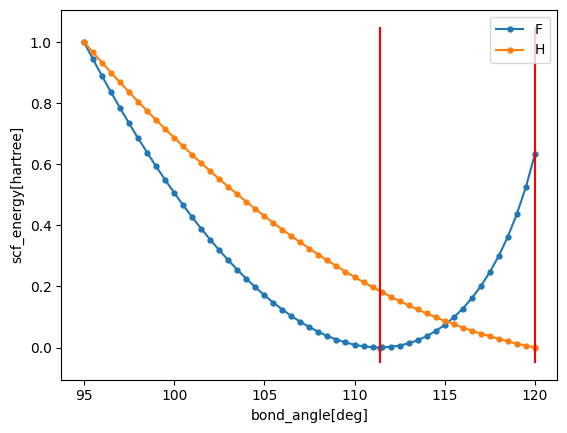

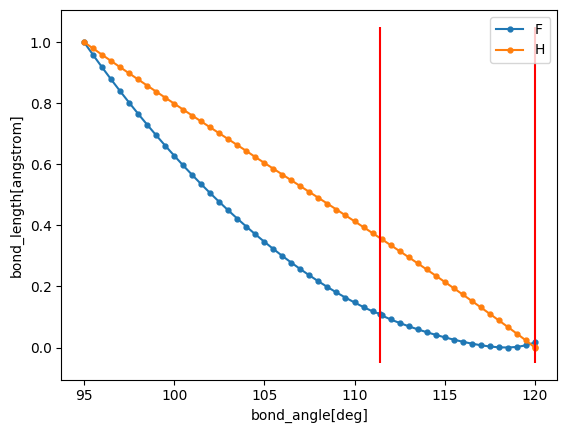

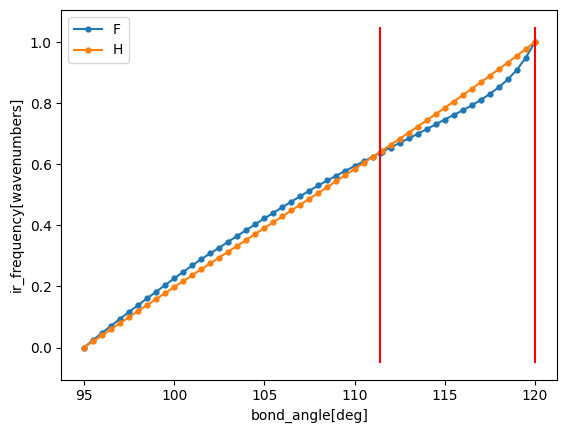

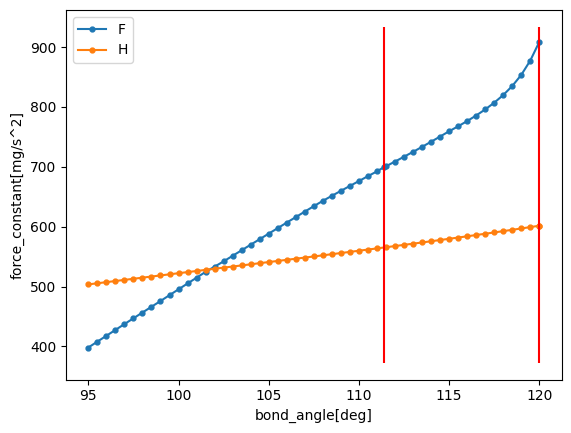

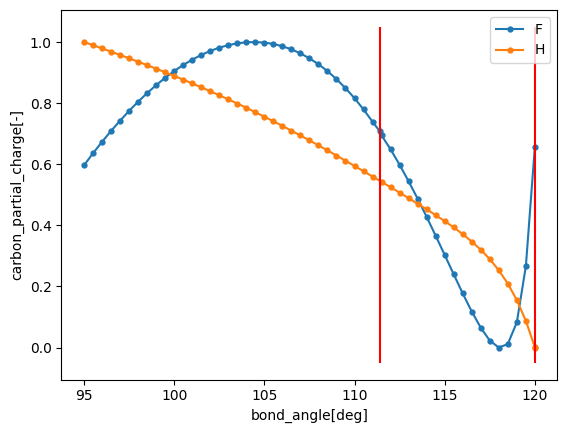

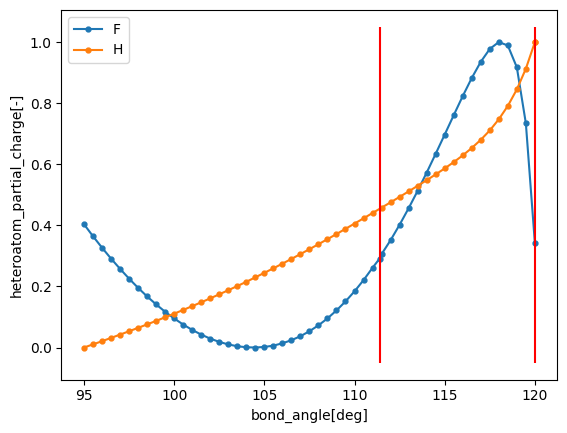

In [20]:
# example using the plotting functions above
fig, ax = plot_data(dataframe, x = "bond_angle[deg]", y = "scf_energy[hartree]", normalize = True, get_figure = True)
add_vertical_lines(fig, ax)
fig, ax = plot_data(dataframe, x = "bond_angle[deg]", y = "bond_length[angstrom]", normalize = True, get_figure = True)
add_vertical_lines(fig, ax)
fig, ax = plot_data(dataframe, x = "bond_angle[deg]", y = "ir_frequency[wavenumbers]", normalize = True, get_figure = True)
add_vertical_lines(fig, ax)
fig, ax = plot_data(dataframe, x = "bond_angle[deg]", y = "force_constant[mg/s^2]", normalize = False, get_figure = True)
add_vertical_lines(fig, ax)
fig, ax = plot_data(dataframe, x = "bond_angle[deg]", y = "carbon_partial_charge[-]", normalize = True, get_figure = True)
add_vertical_lines(fig, ax)
fig, ax = plot_data(dataframe, x = "bond_angle[deg]", y = "heteroatom_partial_charge[-]", normalize = True, get_figure = True)
add_vertical_lines(fig, ax)

### Molecular Orbitals  
---
You may plot the energy profile of each molecular orbital independently, or you may choose to use the code below to plot all molecular orbitals on a single plot.

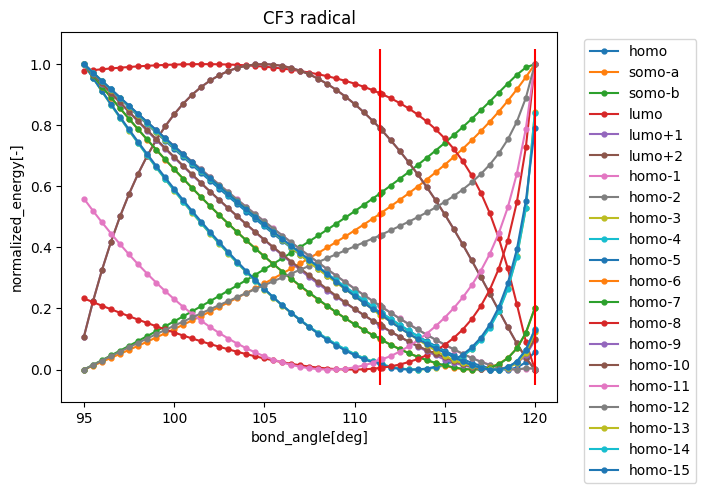

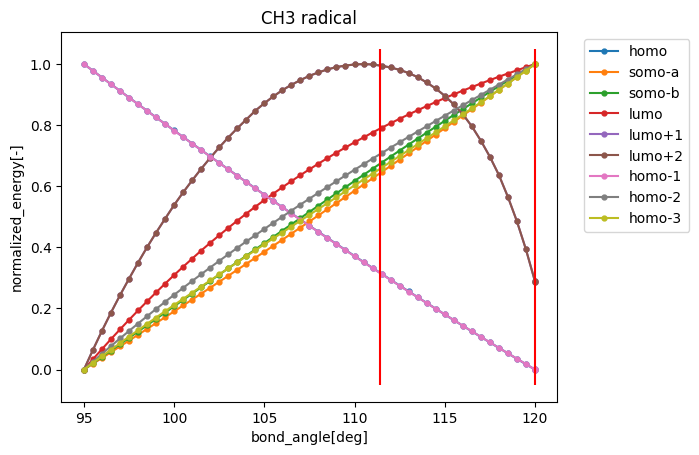

In [21]:
for series_name, group in dataframe.groupby('heteroatom'):
    fig, ax = plt.subplots()
    for mo_energy in dataframe.columns[9:]:
        group.sort_values('bond_angle[deg]', inplace=True)
        x_data = group['bond_angle[deg]']
        y_data = group[mo_energy]
        y_data = normalize_data(y_data)
        if y_data.any() == 0.0:
            continue # skip the orbitals that the CH3 radical does not have
        label_name = mo_energy.split("_")[0]
        ax.plot(x_data, y_data, markersize = 3.5, marker='o', linestyle='-', label=label_name)

    ax.set_xlabel("bond_angle[deg]")
    ax.set_ylabel("normalized_energy[-]")
    ax.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
    ax.set_title("C" + series_name +"3 radical")
    add_vertical_lines(fig, ax)

##### Grouped Molecular Orbitals  
To simplify the analysis, you may choose to group certain orbitals to look at average trends. The code below accomplishes this task. You may choose to edit the types of orbitals you want to group, plot absolute values, or only select the orbital names that align with the frontier orbitals as in the example.

**NOTE**: This grouping is one of many possible interpretations and is not necessarily 'correct'.

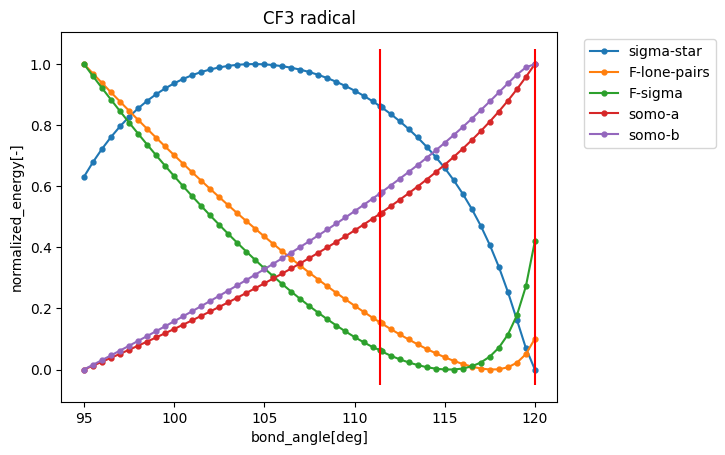

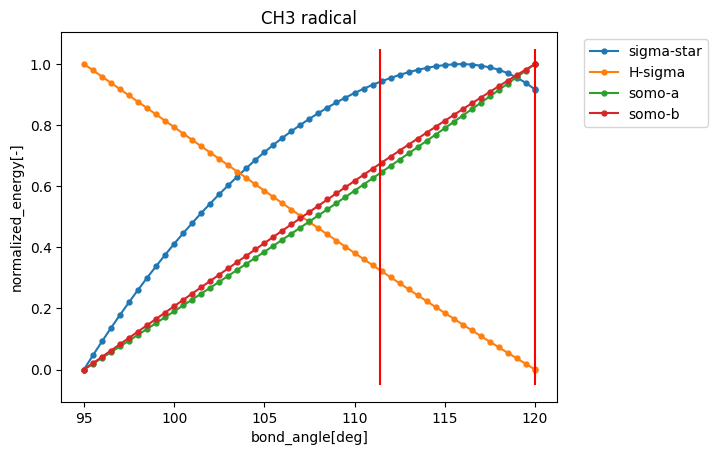

In [23]:
dataframe = pd.read_csv("./summary_data.csv")

# group orbitals for plotting
sigma_star = ['lumo_energy[hartree]', 'lumo+1_energy[hartree]', 'lumo+2_energy[hartree]']
F_lone_pairs = ['homo_energy[hartree]', 'homo-1_energy[hartree]', 'homo-2_energy[hartree]', 'homo-3_energy[hartree]','homo-4_energy[hartree]']
F_sigma = ['homo-5_energy[hartree]', 'homo-6_energy[hartree]', 'homo-7_energy[hartree]','homo-8_energy[hartree]']
H_sigma = ['homo_energy[hartree]', 'homo-1_energy[hartree]', 'homo-2_energy[hartree]']

orbitals = [sigma_star, F_lone_pairs, F_sigma, H_sigma]
orbital_names = ["sigma-star_energy[hartree]", "F-lone-pairs_energy[hartree]", "F-sigma_energy[hartree]", "H-sigma_energy[hartree]"]

# average the energies of the grouped orbitals
simplified_dataframe = dataframe.iloc[:,:3] # retain the filenames, heteroatoms and bond angles from the original dataframe
for orbital, orbital_name in zip(orbitals, orbital_names):
    grouped_orbitals = [dataframe[idx] for idx in orbital]
    simplified_dataframe[orbital_name] = pd.concat(grouped_orbitals, axis=1).mean(axis=1)

# add the somos to the simplified dataframe
simplified_dataframe["somo-a_energy[hartree]"] = dataframe["somo-a_energy[hartree]"]
simplified_dataframe["somo-b_energy[hartree]"] = dataframe["somo-b_energy[hartree]"]

# plot the grouped orbitals
for series_name, group in simplified_dataframe.groupby('heteroatom'):
    fig, ax = plt.subplots()
    for mo_energy in simplified_dataframe.columns[3:]:
        if (series_name == "F") and ("H-sigma" in mo_energy):
            continue # skip plotting the orbitals that the CF3 radical does not have
        if (series_name == "H") and ("F" in mo_energy):
            continue # skip plotting ht eorbitals that the CH3 radical does not have
        group.sort_values('bond_angle[deg]', inplace=True)
        x_data = group['bond_angle[deg]']
        y_data = group[mo_energy]
        y_data = normalize_data(y_data)
        label_name = mo_energy.split("_")[0]
        ax.plot(x_data, y_data, markersize = 3.5, marker='o', linestyle='-', label=label_name)

    ax.set_xlabel("bond_angle[deg]")
    ax.set_ylabel("normalized_energy[-]")
    ax.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
    ax.set_title("C" + series_name +"3 radical")
    add_vertical_lines(fig, ax)

#### Congratulations!  
You have completed module 3.